In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# pandas settings
pd.options.display.max_rows = 10_000
pd.options.display.max_columns = 10_000
pd.options.display.max_colwidth = 10_000

(BONUS QUESTION) Which distribution can be used to model the number of orders incoming each hour?<br>
If we can somehow model it, which problem for owner of Pizza Store can be solved?<br>
(Implement this in a Jupyter Notebook. Upload your implementation on the google drive and share the link below.) 

In [2]:
# #Load data
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20


In [3]:
# check missing values
orders.isna().sum()

order_id           0
order_placed_at    0
dtype: int64

In [4]:
#check duplicates
orders.duplicated().sum()

0

In [5]:
# set date column to datetime object type
orders['order_placed_at'] = pd.to_datetime(orders['order_placed_at'])

In [6]:
# group orders by datetime and count orders
orders_count = orders.groupby(['order_placed_at']).agg({"order_id":"count"})
orders_count.head()

,order_id
order_placed_at,
2020-12-11 00:01:29,1
2020-12-11 00:36:02,1
2020-12-11 00:55:01,1
2020-12-11 01:05:27,1
2020-12-11 01:14:20,1


In [7]:
orders_count.shape

(438928, 1)

In [8]:
orders_count.reset_index().head()

,order_placed_at,order_id
0,2020-12-11 00:01:29,1
1,2020-12-11 00:36:02,1
2,2020-12-11 00:55:01,1
3,2020-12-11 01:05:27,1
4,2020-12-11 01:14:20,1


In [9]:
# resample dataset to total hourly orders
orders_count_hourly = orders_count.resample('H').sum()
orders_count_hourly.head()

,order_id
order_placed_at,
2020-12-11 00:00:00,3
2020-12-11 01:00:00,4
2020-12-11 02:00:00,4
2020-12-11 03:00:00,9
2020-12-11 04:00:00,6


In [10]:
orders_count_hourly.reset_index().head()

,order_placed_at,order_id
0,2020-12-11 00:00:00,3
1,2020-12-11 01:00:00,4
2,2020-12-11 02:00:00,4
3,2020-12-11 03:00:00,9
4,2020-12-11 04:00:00,6


Which distribution can be used to model the number of orders incoming each hour?
Answer: Poisson distribution

If we can somehow model it, which problem for owner of Pizza Store can be solved?

Answer: It can help stores owner know the appoximate amount of pizzas to prepare for the day.<br>
It can help save time and avoid loss or wastage

## Implementation

In [11]:
# statistic
orders_count_hourly['order_id']

order_placed_at
2020-12-11 00:00:00     3
2020-12-11 01:00:00     4
2020-12-11 02:00:00     4
2020-12-11 03:00:00     9
2020-12-11 04:00:00     6
                       ..
2024-01-31 19:00:00    12
2024-01-31 20:00:00    16
2024-01-31 21:00:00    11
2024-01-31 22:00:00     4
2024-01-31 23:00:00     9
Freq: H, Name: order_id, Length: 27528, dtype: int64

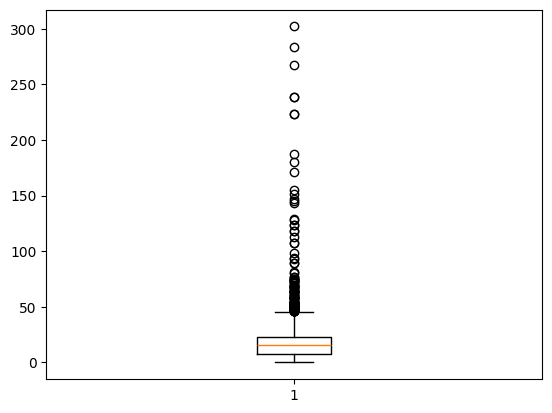

In [12]:
# checking outliers
import matplotlib.pyplot as plt

plt.boxplot(orders_count_hourly['order_id']);

the dataset contain much outliers but we need not remomove them, they might be telling important information about the dataset.

In [13]:
iqr = orders_count_hourly['order_id'].max() - orders_count_hourly['order_id'].min()
lower = orders_count_hourly['order_id'].quantile(0.25) - 1.5 * iqr
upper =orders_count_hourly['order_id'].quantile(0.75) - 1.5 *iqr

In [14]:
clean_orders_count_hourly = orders_count_hourly[(orders_count_hourly['order_id'] >= lower) 
                                                 & (orders_count_hourly['order_id'] <= upper)]

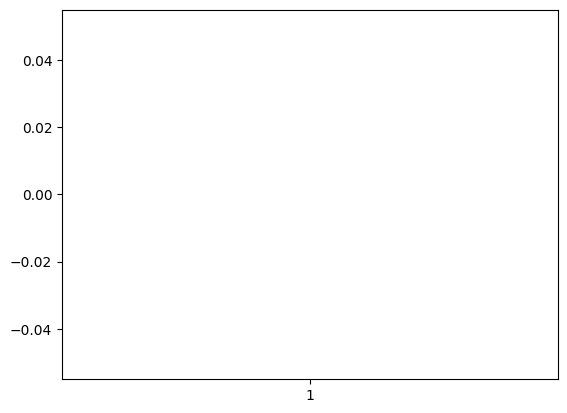

In [15]:
plt.boxplot(clean_orders_count_hourly['order_id']);

removing the outliers, removed all our data points. so we use the original dataset, probably the dataset were randomly generated

In [16]:
# getting the mean and median in the dataset
mean = orders_count_hourly['order_id'].mean()
median = orders_count_hourly['order_id'].median()
print(mean)
print(median)

16.504504504504503
16.0


the mean and median are almost the same value

In [17]:
# predicting probability with poisson formular

# compute factorial
def factorial(n):
    fact = 1
    for i in range(1, n+1):
        fact = fact * i
    return fact

eulers_constant = 2.718

#probability of a single value eg 5 orders

numerator = (eulers_constant ** -mean) * (mean ** 5)
demininator = factorial(5)
prob_3_orders = numerator/demininator
prob_3_orders


0.0006946390011449368